### **RAGAS Evaluation Results Analysis**

Let's anaylze our RAG based on these four metrics, Context Precision, Context Recall, Faithfullness, and Answer Relevancy.

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

---

#### Understanding the Metrics

**Context Precision**

- **Definition**: Measures the proportion of relevant chunks in the retrieved contexts.
- **Interpretation**: A higher value indicates that most of the retrieved contexts are relevant to the user query.

**Context Recall**

- **Definition**: Measures how many of the relevant documents were successfully retrieved.
- **Interpretation**: A higher value means fewer relevant documents were left out.

**Faithfulness**

- **Definition**: Measures the factual consistency of the generated answer against the given context.
- **Interpretation**: A higher value indicates that the answer is well-supported by the retrieved contexts.

**Answer Relevancy**

- **Definition**: Assesses how pertinent the generated answer is to the given prompt.
- **Interpretation**: Higher scores indicate that the answer directly addresses the user's question.

---

#### Data Preparation

Lets visualize our dataset before we dive into the metrics.

In [39]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

data = pd.read_csv('evaluation_results.csv')
data.head()

,user_input,retrieved_contexts,response,reference,context_precision,context_recall,faithfulness,answer_relevancy
0,What is the policy regarding smoking in City o...,['## Smoke-Free Workplace\n\nSmoking is not pe...,"According to the document, smoking is not perm...","Smoking is not permitted in City offices, or w...",1.000000,1.000000,1.0,0.968476
1,How many days of paid sick leave do most full-...,['Most full time employees earn 13 8-hour work...,Most full-time employees earn 13 8-hour workin...,Most full-time employees earn 13 8-hour workin...,1.000000,0.500000,1.0,0.986973
2,What are the three categories of employees eli...,['The following employees are eligible for hea...,The three categories of employees eligible for...,The following employees are eligible:\n\nAll p...,0.700000,1.000000,0.8,0.981254
3,How long must an employee wait before using va...,['An additional vacation entitlement will be a...,An employee must wait at least one year of con...,Employees are not eligible to use vacation in ...,0.416667,0.666667,1.0,0.979251
4,What must an employee do if they're summoned f...,['You must notify your supervisor as soon as y...,An employee must notify their supervisor as so...,An employee must notify their supervisor as so...,0.916667,0.750000,1.0,0.965414


In [40]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

data[['user_input', 'response']].head()

,user_input,response
0,What is the policy regarding smoking in City offices?,"According to the document, smoking is not permitted in City offices, or within n 20 feet of entrances, exits, or operable windows of public buildings."
1,How many days of paid sick leave do most full-time employees earn per year under Civil Service Rules?,Most full-time employees earn 13 8-hour working days per year of paid sick leave under the Civil Service Rules.
2,What are the three categories of employees eligible for health coverage?,"The three categories of employees eligible for health coverage are:\n\n1. All permanent employees of the City whose normal work week at the time of inclusion in the system is not less than 20 hours.\n2. All regularly scheduled provisional employees of the City whose normal work week at the time of inclusion in the system is not less than 20 hours.\n3. All other employees of the City, including temporary, exempt, or ""as needed"" employees who have worked more than 1040 hours in any consecutive 12-month period, and whose normal work week at the time of inclusion in the system is not less than 20 hours."
3,How long must an employee wait before using vacation time after starting employment?,"An employee must wait at least one year of continuous service before using vacation time. At the end of the first year, the employee will be awarded a vacation allowance at the rate of 0.0385 of an hour for each hour of paid service in the preceding year, and will be eligible to use accrued vacation time."
4,What must an employee do if they're summoned for jury duty?,"An employee must notify their supervisor as soon as they receive a jury summons. If they are required to report for jury duty during their working hours, they will be excused from work on the work day they perform jury service, provided they give prior notification to their supervisor."


In [41]:
data[['retrieved_contexts']].head()

,retrieved_contexts
0,"['## Smoke-Free Workplace\n\nSmoking is not permitted in City offices, or within n 20 feet of entrances, exits, or operable windows of public buildings.\n\n## Drug-Free Workplace', '## Policy Regarding the Treatment of Co-Workers and Members of the Public\n\nCity policy requires employees to treat co-workers and members of the public with courtesy and respect. City employees and managers are responsible for maintaining a safe and productive workplace which is free from inappropriate workplace behavior.\n\n## Smoke-Free Workplace', '## Political Activity\n\nIt is unlawful for City employees to use public resources or personnel to engage in political activity relating to elective offices and ballot measures. City employees may not engage in political activities while on duty or in the workplace. Employees may not use City resources, such as photocopier or fax machines, telephones, postage, or email, for political activities. The ban on engaging in political activity while on duty prohibits such activities as circulating petitions, addressing campaign mailers or engaging in any other political activities that use City resources or divert employees from their assigned duties.', '## Use of City and County Property for Business Purposes Only\n\nNo officer or employee may use, nor allow any other r person to use, City resources for any non-City business purpose. Use of City resources fofor personal, political, employee organization or other non-City business is strictly prohibited. City resources include, but are not limited to, facilities, equipment, devices, telephones, computers, copier, fax machine, email, internet access, supplies and any time for which you are receiving compensation from the City. Inappropriate uses of City resources include, but are not limited to: online gambling; viewing sports events online; playing games, streaming video or music on a work computer; viewing or distributing materials that are not related to City business or that are sexually explicit; and frequent talking on a personal cell phone or texting during work hours.', ""The safety and well-being of our employees is very important, and in order to promote a safe and healthy work environment, the City works to identify and eliminate employee exposures to avoidable hazards and conditions that can lead to injury or illness. City departments have Injury and Illness Prevention Programs that comply with federal and state regulations, laws, and statutes in order to help maintain a safe and healthful work environment.\n\nSafety is every City employee's responsibility. All employees are required to remain alert and to correct hazardous conditions and unsafe acts-if it is safe to do so-and to report unsafe conditions to their supervisors.""]"
1,"['Most full time employees earn 13 8-hour working days per year of paid sick leave under the Civil Service Rules. Unused sick leave accrued under the Civil Service Rules may be accumulated from year to year up to a maximum of 130 8-hour working days.\n\nSome employees may be entitled to accrue sick leave under Chapter 12W of the Administrative Code. Please contact your departmental personnel officer for more information.', 'Sick leave with pay is a privilege under the Civil Service Rules, Charter and City Ordinance.\n\nMost full time employees earn 13 8-hour working days per year of paid sick leave under the Civil Service Rules. Unused sick leave accrued under the Civil Service Rules may be accumulated from year to year up to a maximum of 130 8-hour working days.', '## Accrual of Paid Sick Leave\n\nSick leave with pay is a privilege under the Civil Service Rules, Charter and City Ordinance.', 'The maximum vacation entitlement in any 12 month period and maximum accrual permitted for most employees are provided in the chart on the following page.\n\n| Year of Service 12-Month Max. Entitlement | Maximum Accumulation | Maximum Accumulation |\n|-------------------------------------------------------

---

#### **4. Visualizing the Metrics**

Let's create bar charts to visualize each metric for the different user inputs.

In [12]:
def plot_metric(metric):
    data['short_user_input'] = data['user_input'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)
    plt.figure(figsize=(7, 4))
    sns.barplot(x='short_user_input', y=metric, data=data, hue='short_user_input', palette='viridis', legend=False)
    plt.xticks(rotation=75, ha='right', fontsize=8)
    plt.ylim(0, 1.1)
    plt.title(f'{metric.replace("_", " ").title()} for Each User Input')
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel('User Input')
    plt.show()

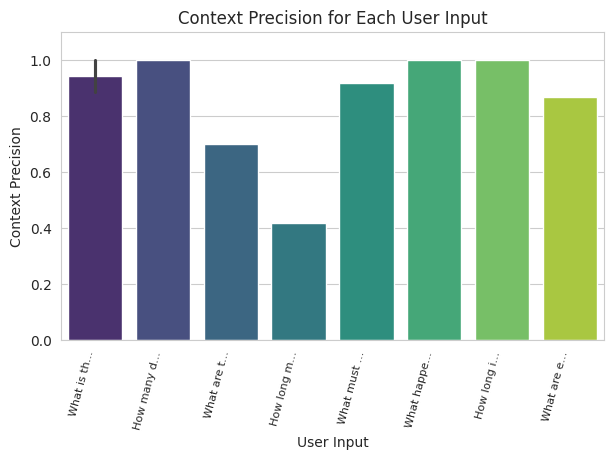

In [13]:
plot_metric('context_precision')

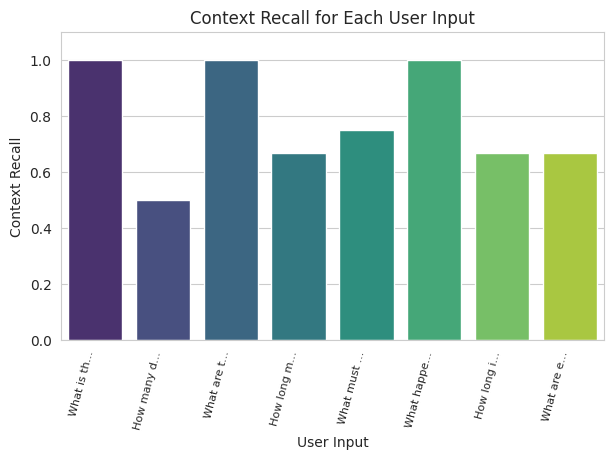

In [14]:
plot_metric('context_recall')

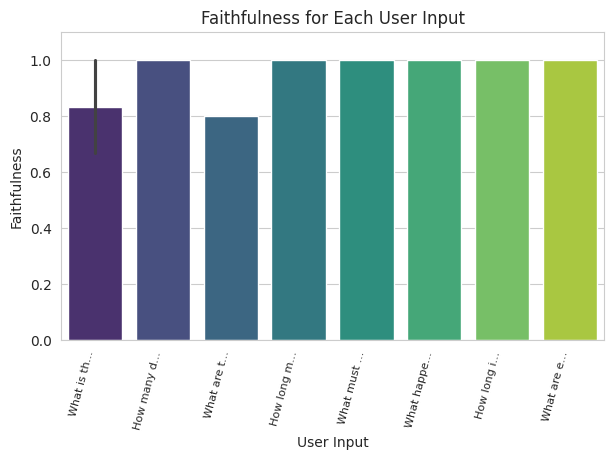

In [16]:
plot_metric('faithfulness')

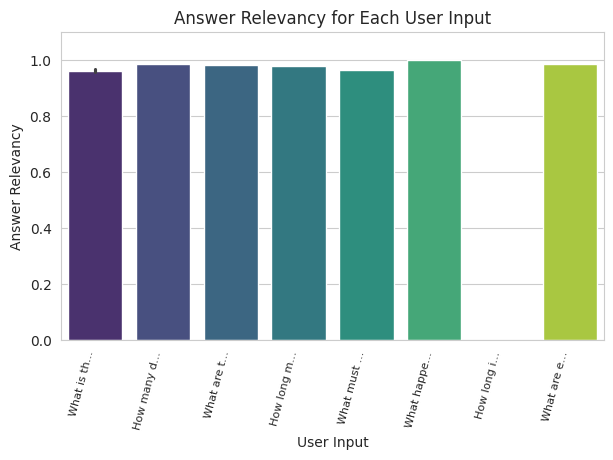

In [23]:
plot_metric('answer_relevancy')

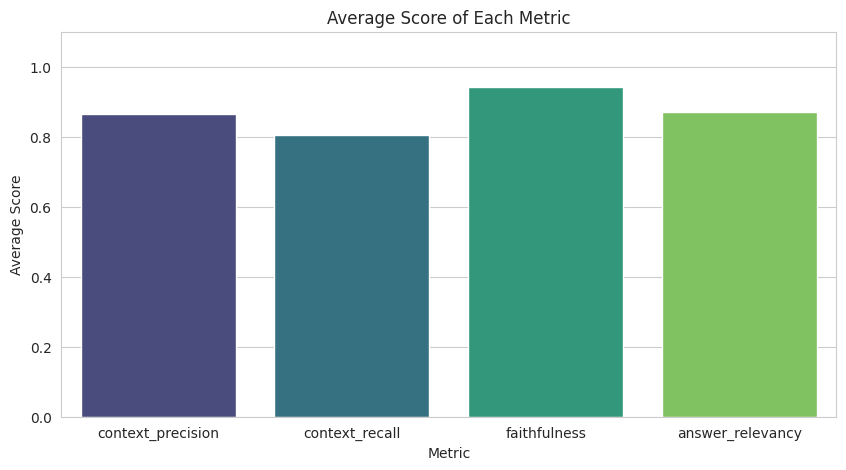

In [38]:
def plot_average_metrics(metrics):
    avg_metrics = {metric: data[metric].mean() for metric in metrics}

    avg_metrics_df = pd.DataFrame({
        'Metric': list(avg_metrics.keys()),
        'Average Score': list(avg_metrics.values())
    })

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Metric', y='Average Score', data=avg_metrics_df, palette='viridis', hue='Metric', dodge=False)
    plt.ylim(0, 1.1)
    plt.title('Average Score of Each Metric')
    plt.ylabel('Average Score')
    plt.xlabel('Metric')
    plt.legend([],[], frameon=False)
    plt.show()

metrics = ['context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']
plot_average_metrics(metrics)


---


- **Queries with Low Context Precision (<0.7):**
  - Improve retrieval mechanisms to filter out irrelevant contexts.

- **Queries with Low Context Recall (<0.7):**
  - Enhance the retrieval system to capture more relevant contexts.

- **Queries with Low Faithfulness (<0.9):**
  - Review the generated answers for unsupported claims.

- **Queries with Low Answer Relevancy (<0.7):**
  - Ensure the response generation effectively utilizes the user query and retrieved contexts.

---

In [42]:
low_metrics = data[
    (data['context_precision'] < 0.7) |
    (data['context_recall'] < 0.7) |
    (data['faithfulness'] < 0.9) |
    (data['answer_relevancy'] < 0.7)
]

low_metrics[['user_input', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']]

,user_input,context_precision,context_recall,faithfulness,answer_relevancy
1,How many days of paid sick leave do most full-time employees earn per year under Civil Service Rules?,1.000000,0.500000,1.000000,0.986973
2,What are the three categories of employees eligible for health coverage?,0.700000,1.000000,0.800000,0.981254
3,How long must an employee wait before using vacation time after starting employment?,0.416667,0.666667,1.000000,0.979251
6,How long is the normal probationary period for permanent civil service positions?,1.000000,0.666667,1.000000,0.000000
7,What are employees required to do in case of a catastrophic event while off duty?,0.866667,0.666667,1.000000,0.987241
8,What is the city's policy on accepting gifts from subordinates?,0.887500,1.000000,0.666667,0.956919


---